# 28. Нелинейный метод наименьших квадратов.

Метод наименьших квадратов — математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных.

**Цель:** Нелинейным методом наименьших квадратов построить модели вида <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>1</mn>
  </msub>
  <msup>
    <mi>e</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <msub>
        <mi>&#x3B2;</mi>
        <mn>2</mn>
      </msub>
      <mi>x</mi>
    </mrow>
  </msup>
  <mstyle>
    <mspace width="2em"></mspace>
  </mstyle>
  <mstyle displaystyle="false">
    <mtext>&#x438;</mtext>
  </mstyle>
  <mstyle>
    <mspace width="2em"></mspace>
  </mstyle>
  <mi>y</mi>
  <mo>=</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>1</mn>
  </msub>
  <msup>
    <mi>e</mi>
    <mrow data-mjx-texclass="ORD">
      <mfrac>
        <msub>
          <mi>&#x3B2;</mi>
          <mn>2</mn>
        </msub>
        <mrow>
          <mi>x</mi>
          <mo>+</mo>
          <msub>
            <mi>&#x3B2;</mi>
            <mn>3</mn>
          </msub>
        </mrow>
      </mfrac>
    </mrow>
  </msup>
</math>

Сначала подклюим необходимые библиотеки:

In [47]:
import matplotlib.pyplot as plt
import math as m
from scipy.optimize import curve_fit # функция curve_fit использует нелинейный метод наименьших квадратов для максимального совпадения построенной функции с исходными данными
import numpy as np

Выпишем все данные нам значения X и Y для модолей:

In [36]:
x = np.array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([34780, 28610, 23650, 19630, 16370, 13720, 11540, 9744, 8261, 7030, 6005, 5147, 4427, 3820, 3307, 2872])

Сначала решим первую модель.

Получм:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>&#x3B2;</mi>
    <mn>1</mn>
  </msub>
  <mo>=</mo>
  <mn>170</mn>
  <mn>336</mn>
  <mo>,</mo>
  <mn>8127</mn>
</math>
и
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>&#x3B2;</mi>
    <mn>2</mn>
  </msub>
  <mo>=</mo>
  <mn>0</mn>
  <mo>,</mo>
  <mn>0332</mn>
</math>

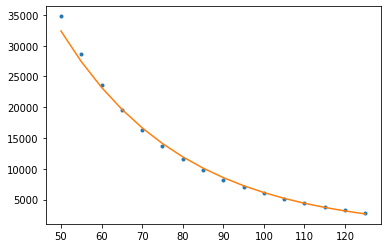

In [37]:
def func(x, b1, b2):
    return b1 * np.exp(-1 * b2 * x)

p = np.empty (16)

for i in range (0, 16):
    p[i] = func(x[i], 170336.8127, 0.0332)
    
plt.plot(x, y, ".")
plt.plot(x, p)
pass

Результаты работы curve_fit и оптимальные значения переменных присваиваются новому массиву переменных. Затем создаём массив новых значений Y с помощью функции и новых значений b1 и b2.

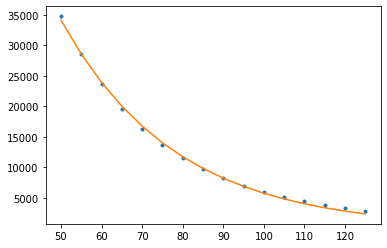

In [61]:
p = [170336.8127, 0.0332]

def func1(x, b1, b2):
    return b1 * np.exp(-1 * b2 * x)

y2 = np.empty (16,  dtype = float)
c, _ = curve_fit(func1, x, y, p)

for i in range(0, 16):
    y2[i] = fun1(x[i], c[0], c[1])
    
plt.plot(x, y,  ".")
plt.plot(x, y2)
pass

Значения b1 и b2 близки к настоящим, сама функция curve_fit позволяет снизить суммарную ошибку. 

Решим вторую модель:

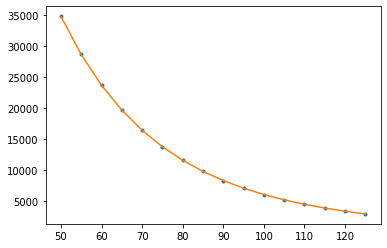

In [59]:
s = [0.001, 1000, 100]

def func2(x, b1, b2, b3):
    return b1 * np.exp(b2 / (x + b3))

y3 = np.empty (16,  dtype = float)
d, _ = curve_fit(fun2, x, y, s)

for i in range(0, 16):
    y3[i] = fun2(x[i], d[0], d[1], d[2])
    
plt.plot(x, y, ".")
plt.plot(x, y3)
pass

Эта модель является самой точной из постренных мною. Докажем это найдя общие ошибки:

In [60]:
e1 = np.array (y - y2)

for i in range (0,16):
    e1[i] = e1[i]**2
    
error1 = sum(e1)/16
e2 = np.array (y - y3)

for i in range (0, 16):
    e2[i] = e2[i]**2
    
error2 = sum(e2) / 16

print("Model errors =", error1, error2)

Model errors = 120954.06416046117 5.496615948219419


Вторая модель оказалась гораздо точнее первой. Очевидно, что точность решения напрямую зависит от количества переменных, по которым составляется уравнение.